# import libraries

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler


# load dataset

In [2]:
dataset = pd.read_csv('houseprice.csv')

In [3]:
dataset.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
dataset.shape

(4600, 18)

# Analysis the Dataset

In [5]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
dataset.country.value_counts()

USA    4600
Name: country, dtype: int64

In [7]:
dataset.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

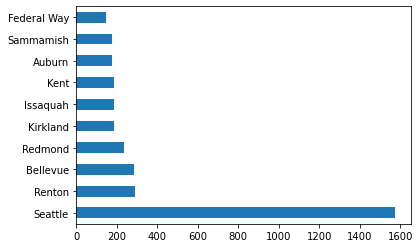

In [8]:
dataset['city'].value_counts()[:10].plot(kind='barh')

In [9]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

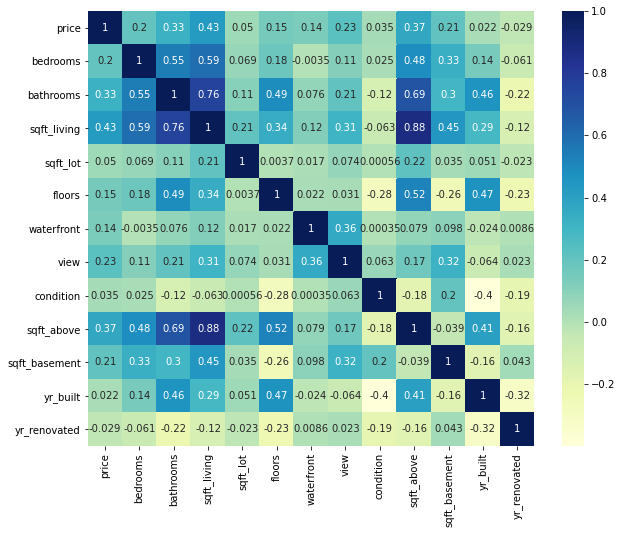

In [10]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
cor = dataset.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

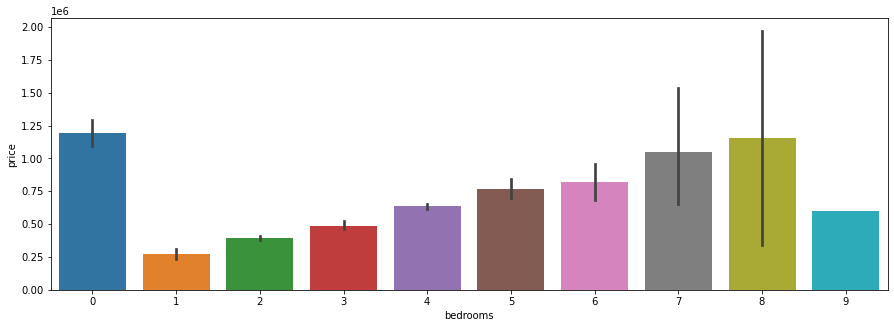

In [11]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = dataset.bedrooms, y = dataset.price)

# Hence proved that 0 & 9 are outliers. Let's remove them

In [12]:
 df = dataset[(dataset.bedrooms > 0) & (dataset.bedrooms < 9)]

In [13]:
df.shape

(4597, 18)

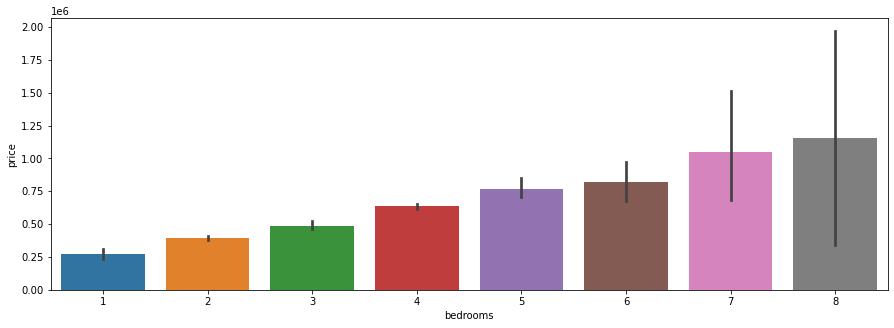

In [14]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bedrooms, y = df.price)

# Let's get the count of respective no. of bedrooms

In [15]:
df.groupby('bedrooms').price.agg([len, min, max,])

,len,min,max
bedrooms,,,
1,38.0,0.0,540000.0
2,566.0,0.0,1695000.0
3,2032.0,0.0,26590000.0
4,1531.0,0.0,4489000.0
5,353.0,0.0,7062500.0
6,61.0,0.0,3100000.0
7,14.0,280000.0,3200000.0
8,2.0,340000.0,1970000.0


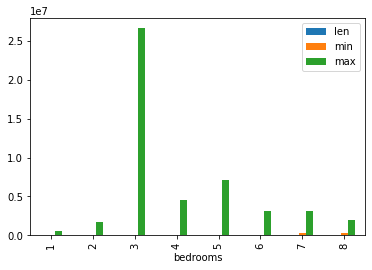

In [16]:
df.groupby(['bedrooms']).price.agg([len,min, max]).plot(kind = "bar") 

# Let's look at the distribution of price

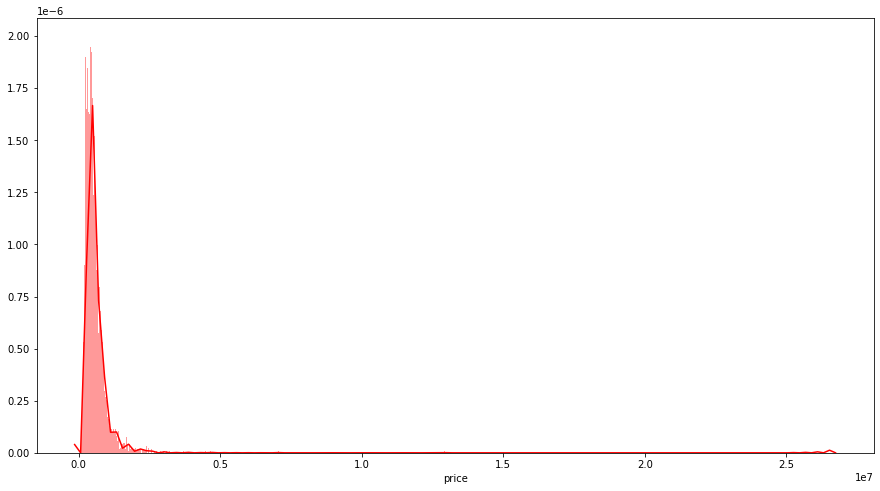

In [17]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)

# We are going to use common ranges from the above table to get similar records from the original dataset and non-zero price to set the values of 0 price instances

In [18]:
df1= df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)]

In [19]:
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
11,5/2/2014 0:00,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
172,5/6/2014 0:00,407000.0,4,2.25,2810,23400,1.0,0,1,3,1710,1100,1958,2004,23024-23198 17th Ave S,Des Moines,WA 98198,USA
207,5/6/2014 0:00,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,1965,0,31607-31633 44th Ave S,Auburn,WA 98001,USA
257,5/7/2014 0:00,749950.0,4,2.75,2600,6050,2.0,0,0,5,1960,640,1949,0,4140 53rd Ave SW,Seattle,WA 98116,USA
261,5/7/2014 0:00,581000.0,4,2.00,2510,13695,1.0,0,0,4,1280,1230,1961,2001,11105 126th Ave NE,Kirkland,WA 98033,USA


In [20]:
df1.shape

(79, 18)

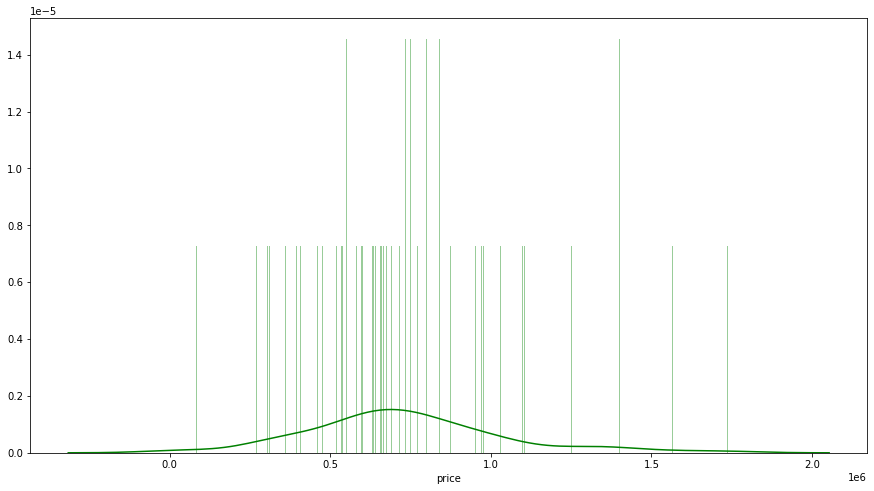

In [21]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = df1.price, bins = 1000, color = 'g', ax = ax)

In [22]:
df1.price.mean()

735475.037070886

# Let's confirm this by comparing with the other house price of the same yr_built and having similar sq_ft

In [23]:
yr_sqft = df[(df.sqft_living > 2499) & (df.sqft_living < 2900)]
yr_price_avg = yr_sqft.groupby('yr_built').price.agg('mean')

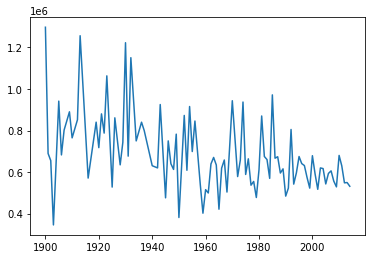

In [24]:
plt.plot(yr_price_avg)

In [25]:
df.drop(['country','city','date'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df.shape

(4597, 15)

In [27]:
df = df.reset_index()
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip
0,0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,WA 98133
1,1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,WA 98119
2,2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,WA 98042
3,3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,WA 98008
4,4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,WA 98052


# preprocessing

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [29]:
df['statezip_encoded'] = le.fit_transform(df.statezip)
df.head()


,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip,statezip_encoded
0,0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,WA 98133,62
1,1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,WA 98119,58
2,2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,WA 98042,26
3,3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,WA 98008,7
4,4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,WA 98052,31


In [30]:
df['street'] = le.fit_transform(df.street)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip,statezip_encoded
0,0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,WA 98133,62
1,1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3898,WA 98119,58
2,2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2290,WA 98042,26
3,3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4261,WA 98008,7
4,4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4349,WA 98052,31


In [31]:
df.drop(['statezip'], axis = 1, inplace = True)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip_encoded
0,0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,62
1,1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3898,58
2,2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2290,26
3,3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4261,7
4,4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4349,31


In [32]:
df.shape

(4597, 16)

# Split data

In [33]:
X = df.iloc[:, 1:]
X.shape

(4597, 15)

In [34]:
y = df.price

In [35]:
y.shape

(4597,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [37]:
X_train.shape

(2758, 15)

In [38]:
X_test.shape

(1839, 15)

In [39]:
y_train.shape

(2758,)

In [40]:
y_test.shape

(1839,)

# Create linear regression object

In [41]:
 
reg = linear_model.LinearRegression()

# Train the model using the training sets

In [42]:
 
reg.fit(X_train,y_train )

LinearRegression()

In [43]:
# regression coefficients 
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 1.00000000e+00 -1.50491471e-11  6.11745852e-11 -2.71441131e-14
 -1.08812723e-17  6.22950105e-12 -3.25251088e-10  1.81678880e-12
  6.22672268e-12 -8.05148498e-15 -1.90934117e-14  1.03882602e-13
  4.78064457e-15 -1.58940242e-15  3.00096444e-13]


# Model performance

In [44]:
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Variance score: 1.0


In [45]:
 y_pred= reg.predict(X_test)
print(y_pred)

[280000. 812000. 392500. ... 206135. 321950. 410000.]


# True value vs predicted value

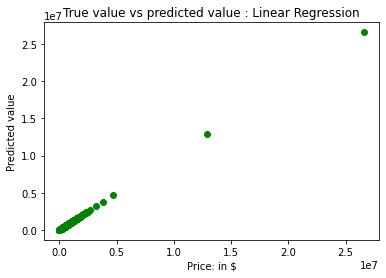

In [46]:
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("Price: in $") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

# Mean Square Error

In [47]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

Mean Square Error :  2.5368637393209572e-20


# Measure  Different Regression Algorithm Score & Mean Squared Error in this Dataset

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# LinearRegression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
list_models=[]
list_scores=[]
list_errors=[]
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=r2_score(y_test,pred_1)
error_1=mean_squared_error(y_test,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)


In [50]:
score_1

1.0

# RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)
pred_2=rfg.predict(x_test)
score_2=r2_score(y_test,pred_2)
error_2=mean_squared_error(y_test,pred_2)
list_models.append('randomforest')
list_scores.append(score_2)
list_errors.append(error_2)

In [52]:
score_2

0.8200439333569033

# Support vector regression 

In [53]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
pred_3=svm.predict(x_test)
score_3=r2_score(y_test,pred_3)
error_3=mean_squared_error(y_test,pred_3)
list_models.append('svr')
list_scores.append(score_3)
list_errors.append(error_3)

In [54]:
score_3

-0.038483237013397176

# Mean squared error

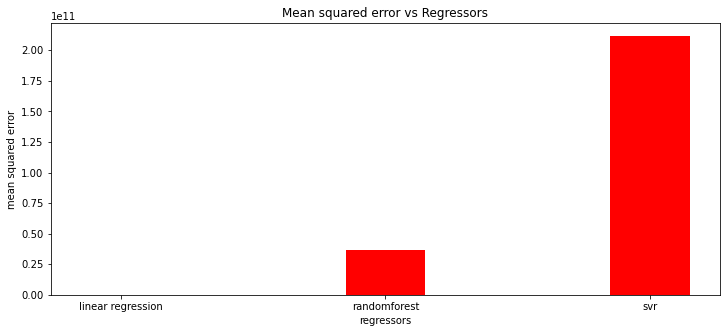

In [55]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_errors,width=0.3,color='r')
plt.title("Mean squared error vs Regressors")
plt.xlabel('regressors')
plt.ylabel('mean squared error')
plt.show()

# r2 score

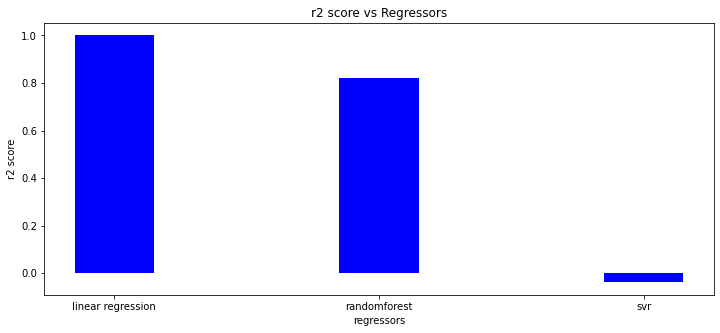

In [56]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores,width=0.3,color='b')
plt.title("r2 score vs Regressors")
plt.xlabel('regressors')
plt.ylabel('r2 score')
plt.show()

